#  Requêter via des API avec Python




<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=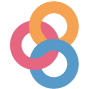)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)

# Introduction : Qu'est-ce qu'une API ?  

## Définition

Pour expliquer le principe d'une API, je vais reprendre le début de 
la fiche dédiée dans la documentation collaborative
[utilitR](https://www.book.utilitr.org/api.html) que je recommande de lire :

> Une *Application Programming Interface* (ou API) est une interface de programmation qui permet d’utiliser une application existante pour restituer des données. Le terme d’API peut être paraître intimidant, mais il s’agit simplement d’une façon de mettre à disposition des données : plutôt que de laisser l’utilisateur consulter directement des bases de données (souvent volumineuses et complexes), l’API lui propose de formuler une requête qui est traitée par le serveur hébergeant la base de données, puis de recevoir des données en réponse à sa requête.
> 
> D’un point de vue informatique, une API est une porte d’entrée clairement identifiée par laquelle un logiciel offre des services à d’autres logiciels (ou utilisateurs). L’objectif d’une API est de fournir un point d’accès à une fonctionnalité qui soit facile à utiliser et qui masque les détails de la mise en oeuvre. Par exemple, l’API Sirene permet de récupérer la raison sociale d’une entreprise à partir de son identifiant Siren en interrogeant le référentiel disponible sur Internet directement depuis un script R, sans avoir à connaître tous les détails du répertoire Sirene.
>
> À l’Insee comme ailleurs, la connexion entre les bases de données pour les nouveaux projets tend à se réaliser par des API. L’accès à des données par des API devient ainsi de plus en plus commun et est amené à devenir une compétence de base de tout utilisateur de données.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## Avantages des API

A nouveau, citons la documentation [utilitR](https://www.book.utilitr.org/api.html)

Les API présentent de multiples avantages :

> * Les API rendent les programmes plus reproductibles. En effet, grâce aux API, il est possible de mettre à jour facilement les données utilisées par un programme si celles-ci évoluent. Cette flexibilité accrue pour l’utilisateur évite au producteur de données d’avoir à réaliser de multiples extractions, et réduit le problème de la coexistence de versions différentes des données.
> * Grâce aux API, l’utilisateur peut extraire facilement une petite partie d’une base de données plus conséquente.
> * Les API permettent de mettre à disposition des données tout en limitant le nombre de personnes ayant accès aux bases de données elles-mêmes.
> * Grâce aux API, il est possible de proposer des services sur mesure pour les utilisateurs (par exemple, un accès spécifique pour les gros utilisateurs).
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## Utilisation des API

Citons encore une fois
la documentation [`utilitR`](https://www.book.utilitr.org/api.html)

> Une API peut souvent être utilisée de deux façons : par une interface Web, et par l’intermédiaire d’un logiciel (R, Python…). Par ailleurs, les API peuvent être proposées avec un niveau de liberté variable pour l’utilisateur :
> 
> * soit en libre accès (l’utilisation n’est pas contrôlée et l’utilisateur peut utiliser le service comme bon lui semble) ;
> * soit via la génération d’un compte et d’un jeton d’accès qui permettent de sécuriser l’utilisation de l’API et de limiter le nombre de requêtes.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

De nombreuses API nécessitent une authentification, c'est-à-dire un 
compte utilisateur afin de pouvoir accéder aux données. 
Dans un premier temps, 
nous regarderons exclusivement les API ouvertes sans restriction d'accès.  
Certains exercices et exemples permettront néanmoins d'essayer des API
avec restrictions d'accès. 

# Requêter une API

## Principe général

> L’utilisation de l’interface Web est utile dans une démarche exploratoire mais trouve rapidement ses limites, notamment lorsqu’on consulte régulièrement l’API. L’utilisateur va rapidement se rendre compte qu’il est beaucoup plus commode d’utiliser une API via un logiciel de traitement pour automatiser la consultation ou pour réaliser du téléchargement de masse. De plus, l’interface Web n’existe pas systématiquement pour toutes les API.
> 
> Le mode principal de consultation d’une API consiste à adresser une requête à cette API via un logiciel adapté (R, Python, Java…). Comme pour l’utilisation d’une fonction, l’appel d’une API comprend des paramètres qui sont détaillées dans la documentation de l’API. 
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

Voici les éléments importants à avoir en tête sur les requêtes (j'emprunte encore
à [`utilitR`](https://www.book.utilitr.org/api.html)):

* Le __point d’entrée__ d’un service offert par une API se présente sous la forme d’une URL (adresse web). Chaque service proposé par une API a sa propre URL. Par exemple, dans le cas de l’OpenFood Facts,
l'URL à utiliser pour obtenir des informations sur un produit particulier (l'identifiant `737628064502`) estg https://world.openfoodfacts.org/api/v0/product/737628064502.json
* Cette URL doit être complétée avec différents paramètres qui précisent la requête (par exemple l’identifiant Siren). Ces paramètres viennent s’ajouter à l’URL, souvent à la suite de `?`. Chaque service proposé par une API a ses propres paramètres, détaillés dans la documentation. 
* Lorsque l’utilisateur soumet sa requête, l’API lui renvoie une réponse structurée contenant l’ensemble des informations demandées. Le résultat envoyé par une API est majoritairement aux formats JSON ou XML (deux formats dans lesquels les informations sont hiérarchisées de manière emboitée). Plus rarement, certains services proposent une information sous forme plate (de type csv).
* Du fait de la dimension hiérarchique des formats JSON ou XML, le résultat n’est pas toujours facile à récupérer mais
`python` propose d'excellents outils pour cela (meilleurs que ceux de `R`). Certains packages, notamment `json`, facilitent l’extraction de champs d’une sortie d’API. Dans certains cas, des packages spécifiques à une API ont été créés pour simplifier l’écriture d’une requête ou la récupération du résultat. Par exemple, le package
[pynsee](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)
propose des options qui seront retranscrites automatiquement dans l'URL de 
requête pour faciliter le travail sur les données Insee. 

## Exemple avec l'API de la Banque Mondiale

Avec l'API de la Banque mondiale, voici comme s'écrit une requête : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC

1. Le point d'entrée est l'URL <http://api.worldbank.org/v2>
2. Un filtre est appliqué sur les pays (`countries?`) afin de ne conserver
que celles telles que `incomeLevel=LMC` (*"Lower middle income"*)

En cliquant sur le lien, le site renvoie des données en XML,
qui ressemblent pas mal à ce qu'on a vu plus tôt avec le scraping : une structure avec des balises qui s'ouvrent et qui se ferment.

Pour obtenir la même information en `Python`, il faut revenir aux fondamentaux : on va avoir besoin du module `requests`. Suivant les API, nous avons soit besoin de rien de plus si nous parvenons directement à obtenir un json, soit devoir utiliser un *parser* comme `BeautifulSoup` dans le cas contraire. 

Avec l'API de la banque mondiale, on va utiliser le module `requests` et sa méthode `get` : on lui donne l'url de l'API qui nous intéresse, on lui demande d'en faire un json et le tour est *en apparence* joué.


In [ ]:
import requests
r = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC')

Prenons par exemple les 1000 premiers caractères du résultat:


In [ ]:
print(r.content[:1000])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): RuntimeError: Evaluation error: object 'content' not found.
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/usr/local/lib/R/site-library/reticulate/python/rpytools/call.py", line 21, in python_function
##     raise RuntimeError(res[kErrorKey])
```

Quand on regarde de plus près, on voit que les informations suivantes apparaissent: 
 
* Code du pays
* Nom du pays
* Région
* Classification en termes de revenus
* Les types de prêt pour ces pays
* La capitale
* Longitude
* Latitude

Le format XML est fortement balisé, ce qui n'est pas très pratique. 
En utilisant désormais un autre URL, on obtient un JSON, plus pratique pour travailler : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json


In [ ]:
import requests
import pandas as pd

r = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json')

A nouveau, les premiers caractères sont les suivants:


In [ ]:
print(r.content[:1000])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): RuntimeError: Evaluation error: object 'content' not found.
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/usr/local/lib/R/site-library/reticulate/python/rpytools/call.py", line 21, in python_function
##     raise RuntimeError(res[kErrorKey])
```

Cela ressemble déjà plus à un dictionnaire `Python`[^1].

[^1]: Le JSON est un format très apprécié dans le domaine du *big data*
car il permet de stocker de manière intelligente des données
de structures diverses. Il 
s'agit d'un des formats privilégiés du paradigme No-SQL pour lequel
cet [excellent cours](http://b3d.bdpedia.fr/) propose plus de détails

Ici, il n'est même pas nécessaire en première approche 
d'utiliser le package `json`, l'information
étant déjà tabulée dans l'écho renvoyé (on a la même information pour tous les pays):


In [ ]:
wb = r.json()

```
## Error in py_call_impl(callable, dots$args, dots$keywords): RuntimeError: Evaluation error: object 'json' not found.
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/usr/local/lib/R/site-library/reticulate/python/rpytools/call.py", line 21, in python_function
##     raise RuntimeError(res[kErrorKey])
```

In [ ]:
wb = pd.json_normalize(wb[1])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'wb' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
wb.head(5)

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'wb' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

Cependant, si on regarde la dimension de l'objet obtenu, on obtient un
chiffre rond (50 lignes). Ceci est suspect et un petit tour dans la
documentation de l'API nous apprendrait que c'est le nombre maximal de 
retour possible. Il faut donc faire attention à la documentation et 
ajouter un paramètre `page=2` pour rattraper les derniers échos: 


In [ ]:
wb2 = pd.json_normalize(
    requests.get("http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json&page=2").json()[1]
    )
pd.concat([wb, wb2])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'wb' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

Si on regarde l'information présente dans le DataFrame, on voit qu'elle se
présente sous forme `lendingType.value`. C'est parce que `pandas` a 
concaténé les différents niveaux de notre dictionnaire. Si on désire
s'en assurer, on peut regarder sur un exemple:


In [ ]:
r.json()[1][0]['incomeLevel']['value'] == wb.loc[0, 'incomeLevel.value'] 

```
## Error in py_call_impl(callable, dots$args, dots$keywords): RuntimeError: Evaluation error: object 'json' not found.
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/usr/local/lib/R/site-library/reticulate/python/rpytools/call.py", line 21, in python_function
##     raise RuntimeError(res[kErrorKey])
```

## Un catalogue incomplet d'API existantes

De plus en plus de sites mettent des API à disposition des développeurs et autres curieux. 

Pour en citer quelques-unes très connues : 

- Twitter <i class="fab fa-twitter"></i> : https://dev.twitter.com/rest/public
- Facebook <i class="fab fa-facebook"></i> : https://developers.facebook.com/
- Instagram <i class="fab fa-instagram"></i> : https://www.instagram.com/developer/
- Spotify <i class="fab fa-spotify"></i> : https://developer.spotify.com/web-api/

Cependant, il est intéressant de ne pas se restreindre à celles-ci. Beaucoup
de producteurs de données, privés comme publics, mettent à disposition 
leurs données sous forme d'API

- Pole Emploi : https://www.emploi-store-dev.fr/portail-developpeur-cms/home.html
- SNCF : https://data.sncf.com/api
- Banque Mondiale : https://datahelpdesk.worldbank.org/knowledgebase/topics/125589
- Insee: https://api.insee.fr/catalogue/ et [`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)

# L'API DVF : accéder à des données de transactions immobilières simplement

Le site `DVF` (demandes de valeurs foncières) permet de visualiser toutes les données relatives aux mutations à titre onéreux (ventes de maisons, appartements, garages...) réalisées durant les 5 dernières années

Un site de visualisation est disponible sur <https://app.dvf.etalab.gouv.fr/>

Ce site est très complet quand il s'agit de connaître le prix moyen au mètre
carré d'un quartier ou de comparer des régions entre elles. 
L'API DVF permet d'aller plus loin afin de récupérer les résultats dans 
un logiciel de traitement de données. Elle a été réalisée par
[Christian Quest](https://github.com/cquest) et le code
source est disponible sur Github <a href="https://github.com/cquest/dvf_as_api" class="github"><i class="fab fa-github"></i></a>

Les critères de recherche sont les suivants :
- `code_commune` = code INSEE de la commune (ex: 94068)
- `section` = section cadastrale (ex: 94068000CQ)
- `numero_plan` = identifiant de la parcelle, (ex: 94068000CQ0110)
- `lat` + `lon` + `dist` (optionnel): pour une recherche géographique, dist est par défaut un rayon de 500m
- `code_postal`

Les filtres de sélection complémentaires :
- `nature_mutation` (Vente, etc)
- `type_local` (Maison, Appartement, Local, Dépendance)


:one: 
Rechercher toutes les transactions existantes dans DVF à Plogoff (code commune `29168`, en Bretagne).
Afficher les clés du JSON et en déduire le nombre de transactions répertoriées. 



:two: 
N'afficher que les transactions portant sur des maisons. Le résultat devrait
ressembler au DataFrame suivant:

```
##     code_service_ch reference_document  ... geom.type        geom.coordinates
## 0              None               None  ...     Point  [-4.705626, 48.042047]
## 1              None               None  ...     Point  [-4.709215, 48.038356]
## 2              None               None  ...     Point  [-4.709152, 48.038782]
## 3              None               None  ...     Point  [-4.708496, 48.038467]
## 4              None               None  ...     Point  [-4.708192, 48.038626]
## ..              ...                ...  ...       ...                     ...
## 129            None               None  ...     Point   [-4.70207, 48.039692]
## 130            None               None  ...     Point   [-4.699823, 48.03942]
## 131            None               None  ...     Point  [-4.700808, 48.038956]
## 132            None               None  ...     Point  [-4.700004, 48.037184]
## 133            None               None  ...     Point  [-4.712316, 48.037312]
## 
## [134 rows x 47 columns]
```

:three: Utiliser l'[API geo](https://api.gouv.fr/documentation/api-geo) pour
récupérer le découpage communal de la ville de Plogoff


:four:
Représenter l'histogramme des prix de vente


In [ ]:
p = ventes["valeur_fonciere"].plot(kind = "hist")
p

![plot of chunk unnamed-chunk-12](unnamed-chunk-12-1.png)




N'hésitez pas à aller plus loin en jouant sur des variables de
groupes par exemple

:five: 
On va faire une carte des ventes en affichant le prix de l'achat.

Supposons que le DataFrame des ventes s'appelle `ventes`. Il faut d'abord le
convertir
en objet `geopandas`. 


In [ ]:
ventes = ventes.dropna(subset = ['lat','lon'])
ventes = gpd.GeoDataFrame(ventes, geometry=gpd.points_from_xy(ventes.lon, ventes.lat))
ventes

```
##     code_service_ch reference_document  ... geom                   geometry
## 0              None               None  ...  NaN  POINT (-4.71797 48.03781)
## 1              None               None  ...  NaN  POINT (-4.71797 48.03781)
## 2              None               None  ...  NaN  POINT (-4.70949 48.04230)
## 3              None               None  ...  NaN  POINT (-4.70696 48.04313)
## 4              None               None  ...  NaN  POINT (-4.70555 48.04223)
## ..              ...                ...  ...  ...                        ...
## 434            None               None  ...  NaN  POINT (-4.71243 48.03708)
## 435            None               None  ...  NaN  POINT (-4.71232 48.03731)
## 436            None               None  ...  NaN  POINT (-4.71232 48.03731)
## 437            None               None  ...  NaN  POINT (-4.71186 48.03727)
## 438            None               None  ...  NaN  POINT (-4.71601 48.03396)
## 
## [431 rows x 49 columns]
```

Pour représenter graphiquement, on peut utiliser le code suivant (essayez de
le comprendre et pas uniquement de l'exécuter)


In [ ]:
import folium

center = ventes[['lat', 'lon']].mean().values.tolist()
sw = ventes[['lat', 'lon']].min().values.tolist()
ne = ventes[['lat', 'lon']].max().values.tolist()

m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(ventes)):
    folium.Marker([ventes.iloc[i]['lat'], ventes.iloc[i]['lon']], popup=ventes.iloc[i]['valeur_fonciere']).add_to(m) #bug du paramètre popup

```
## <folium.map.Marker object at 0x7f68a593fbb0>
## <folium.map.Marker object at 0x7f68a296aa90>
## <folium.map.Marker object at 0x7f68a296a6d0>
## <folium.map.Marker object at 0x7f68a296ae50>
## <folium.map.Marker object at 0x7f68a296a670>
## <folium.map.Marker object at 0x7f68a296aa60>
## <folium.map.Marker object at 0x7f68a296aca0>
## <folium.map.Marker object at 0x7f68a296adc0>
## <folium.map.Marker object at 0x7f68a39f0a90>
## <folium.map.Marker object at 0x7f68a39f0fd0>
## <folium.map.Marker object at 0x7f68a39f0d30>
## <folium.map.Marker object at 0x7f68a39f0f70>
## <folium.map.Marker object at 0x7f68a5927550>
## <folium.map.Marker object at 0x7f68a298f1c0>
## <folium.map.Marker object at 0x7f68a298f520>
## <folium.map.Marker object at 0x7f68a298f250>
## <folium.map.Marker object at 0x7f68a298f370>
## <folium.map.Marker object at 0x7f68a298f580>
## <folium.map.Marker object at 0x7f68a298f6a0>
## <folium.map.Marker object at 0x7f68a298f850>
## <folium.map.Marker object at 0x7f68a298f6d0>
## <folium.map.Marker object at 0x7f68a298f1f0>
## <folium.map.Marker object at 0x7f68a296b070>
## <folium.map.Marker object at 0x7f68a2987130>
## <folium.map.Marker object at 0x7f68a2987250>
## <folium.map.Marker object at 0x7f68a2987370>
## <folium.map.Marker object at 0x7f68a2987490>
## <folium.map.Marker object at 0x7f68a29875b0>
## <folium.map.Marker object at 0x7f68a29876d0>
## <folium.map.Marker object at 0x7f68a29877f0>
## <folium.map.Marker object at 0x7f68a2987910>
## <folium.map.Marker object at 0x7f68a2987a30>
## <folium.map.Marker object at 0x7f68a2987b50>
## <folium.map.Marker object at 0x7f68a2987c70>
## <folium.map.Marker object at 0x7f68a2987d90>
## <folium.map.Marker object at 0x7f68a2987eb0>
## <folium.map.Marker object at 0x7f68a29870d0>
## <folium.map.Marker object at 0x7f68a515cf40>
## <folium.map.Marker object at 0x7f68a515ce50>
## <folium.map.Marker object at 0x7f68a515cdc0>
## <folium.map.Marker object at 0x7f68a515cc10>
## <folium.map.Marker object at 0x7f68a515cb20>
## <folium.map.Marker object at 0x7f68a515c9a0>
## <folium.map.Marker object at 0x7f68a515c850>
## <folium.map.Marker object at 0x7f68a515c700>
## <folium.map.Marker object at 0x7f68a515c640>
## <folium.map.Marker object at 0x7f68a515c520>
## <folium.map.Marker object at 0x7f68a515c430>
## <folium.map.Marker object at 0x7f68a515c310>
## <folium.map.Marker object at 0x7f68a515c1f0>
## <folium.map.Marker object at 0x7f68a515cca0>
## <folium.map.Marker object at 0x7f68a512d130>
## <folium.map.Marker object at 0x7f68a512d250>
## <folium.map.Marker object at 0x7f68a512d370>
## <folium.map.Marker object at 0x7f68a512d490>
## <folium.map.Marker object at 0x7f68a512d5b0>
## <folium.map.Marker object at 0x7f68a512d6d0>
## <folium.map.Marker object at 0x7f68a512d7f0>
## <folium.map.Marker object at 0x7f68a512d910>
## <folium.map.Marker object at 0x7f68a512da30>
## <folium.map.Marker object at 0x7f68a512db50>
## <folium.map.Marker object at 0x7f68a512dc70>
## <folium.map.Marker object at 0x7f68a512dd90>
## <folium.map.Marker object at 0x7f68a512deb0>
## <folium.map.Marker object at 0x7f68a512d0d0>
## <folium.map.Marker object at 0x7f68a514a130>
## <folium.map.Marker object at 0x7f68a514a250>
## <folium.map.Marker object at 0x7f68a514a370>
## <folium.map.Marker object at 0x7f68a514a490>
## <folium.map.Marker object at 0x7f68a514a5b0>
## <folium.map.Marker object at 0x7f68a514a6d0>
## <folium.map.Marker object at 0x7f68a514a7f0>
## <folium.map.Marker object at 0x7f68a514a910>
## <folium.map.Marker object at 0x7f68a514aa30>
## <folium.map.Marker object at 0x7f68a514ab50>
## <folium.map.Marker object at 0x7f68a514ac70>
## <folium.map.Marker object at 0x7f68a514ad90>
## <folium.map.Marker object at 0x7f68a514aeb0>
## <folium.map.Marker object at 0x7f68a514a0d0>
## <folium.map.Marker object at 0x7f68a5151130>
## <folium.map.Marker object at 0x7f68a5151250>
## <folium.map.Marker object at 0x7f68a5151370>
## <folium.map.Marker object at 0x7f68a5151490>
## <folium.map.Marker object at 0x7f68a51515b0>
## <folium.map.Marker object at 0x7f68a51516d0>
## <folium.map.Marker object at 0x7f68a51517f0>
## <folium.map.Marker object at 0x7f68a5151910>
## <folium.map.Marker object at 0x7f68a5151a30>
## <folium.map.Marker object at 0x7f68a5151b50>
## <folium.map.Marker object at 0x7f68a5151c70>
## <folium.map.Marker object at 0x7f68a5151d90>
## <folium.map.Marker object at 0x7f68a5151ee0>
## <folium.map.Marker object at 0x7f68a5151df0>
## <folium.map.Marker object at 0x7f68a515b160>
## <folium.map.Marker object at 0x7f68a515b280>
## <folium.map.Marker object at 0x7f68a515b3a0>
## <folium.map.Marker object at 0x7f68a515b4c0>
## <folium.map.Marker object at 0x7f68a515b5e0>
## <folium.map.Marker object at 0x7f68a515b700>
## <folium.map.Marker object at 0x7f68a515b820>
## <folium.map.Marker object at 0x7f68a515b940>
## <folium.map.Marker object at 0x7f68a515ba60>
## <folium.map.Marker object at 0x7f68a515bbb0>
## <folium.map.Marker object at 0x7f68a515bcd0>
## <folium.map.Marker object at 0x7f68a515bdf0>
## <folium.map.Marker object at 0x7f68a515bf10>
## <folium.map.Marker object at 0x7f68a515b100>
## <folium.map.Marker object at 0x7f68a5a06190>
## <folium.map.Marker object at 0x7f68a5a062b0>
## <folium.map.Marker object at 0x7f68a5a063d0>
## <folium.map.Marker object at 0x7f68a5a064f0>
## <folium.map.Marker object at 0x7f68a5a06610>
## <folium.map.Marker object at 0x7f68a5a06730>
## <folium.map.Marker object at 0x7f68a5a06850>
## <folium.map.Marker object at 0x7f68a5a06970>
## <folium.map.Marker object at 0x7f68a5a06a90>
## <folium.map.Marker object at 0x7f68a5a06bb0>
## <folium.map.Marker object at 0x7f68a5a06cd0>
## <folium.map.Marker object at 0x7f68a5a06df0>
## <folium.map.Marker object at 0x7f68a5a06f10>
## <folium.map.Marker object at 0x7f68a5a06040>
## <folium.map.Marker object at 0x7f68a59f7190>
## <folium.map.Marker object at 0x7f68a59f72b0>
## <folium.map.Marker object at 0x7f68a59f73d0>
## <folium.map.Marker object at 0x7f68a59f74f0>
## <folium.map.Marker object at 0x7f68a59f7610>
## <folium.map.Marker object at 0x7f68a59f7730>
## <folium.map.Marker object at 0x7f68a59f7850>
## <folium.map.Marker object at 0x7f68a59f7970>
## <folium.map.Marker object at 0x7f68a59f7a90>
## <folium.map.Marker object at 0x7f68a59f7bb0>
## <folium.map.Marker object at 0x7f68a59f7cd0>
## <folium.map.Marker object at 0x7f68a59f7df0>
## <folium.map.Marker object at 0x7f68a59f7f10>
## <folium.map.Marker object at 0x7f68a59f7070>
## <folium.map.Marker object at 0x7f68a59f9040>
## <folium.map.Marker object at 0x7f68a59f9160>
## <folium.map.Marker object at 0x7f68a59f9400>
## <folium.map.Marker object at 0x7f68a59f9370>
## <folium.map.Marker object at 0x7f68a59f95b0>
## <folium.map.Marker object at 0x7f68a59f96d0>
## <folium.map.Marker object at 0x7f68a59f97c0>
## <folium.map.Marker object at 0x7f68a59f98e0>
## <folium.map.Marker object at 0x7f68a59f99a0>
## <folium.map.Marker object at 0x7f68a59f9b20>
## <folium.map.Marker object at 0x7f68a59f9c10>
## <folium.map.Marker object at 0x7f68a59f9d90>
## <folium.map.Marker object at 0x7f68a59f9f40>
## <folium.map.Marker object at 0x7f68a59f9c70>
## <folium.map.Marker object at 0x7f68a59ddee0>
## <folium.map.Marker object at 0x7f68a59ddd90>
## <folium.map.Marker object at 0x7f68a59dd880>
## <folium.map.Marker object at 0x7f68a59ddb80>
## <folium.map.Marker object at 0x7f68a59dda60>
## <folium.map.Marker object at 0x7f68a59dd910>
## <folium.map.Marker object at 0x7f68a59dd820>
## <folium.map.Marker object at 0x7f68a59dd700>
## <folium.map.Marker object at 0x7f68a59dd580>
## <folium.map.Marker object at 0x7f68a59dd430>
## <folium.map.Marker object at 0x7f68a59dd2b0>
## <folium.map.Marker object at 0x7f68a59dd280>
## <folium.map.Marker object at 0x7f68a59dd130>
## <folium.map.Marker object at 0x7f68a59ddc40>
## <folium.map.Marker object at 0x7f68a28d1190>
## <folium.map.Marker object at 0x7f68a28d12b0>
## <folium.map.Marker object at 0x7f68a28d13d0>
## <folium.map.Marker object at 0x7f68a28d14f0>
## <folium.map.Marker object at 0x7f68a28d1610>
## <folium.map.Marker object at 0x7f68a28d1730>
## <folium.map.Marker object at 0x7f68a28d1850>
## <folium.map.Marker object at 0x7f68a28d1970>
## <folium.map.Marker object at 0x7f68a28d1a90>
## <folium.map.Marker object at 0x7f68a28d1bb0>
## <folium.map.Marker object at 0x7f68a28d1cd0>
## <folium.map.Marker object at 0x7f68a28d1df0>
## <folium.map.Marker object at 0x7f68a28d1f10>
## <folium.map.Marker object at 0x7f68a28d1070>
## <folium.map.Marker object at 0x7f68a28c3190>
## <folium.map.Marker object at 0x7f68a28c32b0>
## <folium.map.Marker object at 0x7f68a28c33d0>
## <folium.map.Marker object at 0x7f68a28c34f0>
## <folium.map.Marker object at 0x7f68a28c3610>
## <folium.map.Marker object at 0x7f68a28c3730>
## <folium.map.Marker object at 0x7f68a28c3850>
## <folium.map.Marker object at 0x7f68a28c3970>
## <folium.map.Marker object at 0x7f68a28c3a90>
## <folium.map.Marker object at 0x7f68a28c3bb0>
## <folium.map.Marker object at 0x7f68a28c3cd0>
## <folium.map.Marker object at 0x7f68a28c3df0>
## <folium.map.Marker object at 0x7f68a28c3f10>
## <folium.map.Marker object at 0x7f68a28c3070>
## <folium.map.Marker object at 0x7f68a28cc190>
## <folium.map.Marker object at 0x7f68a28cc2b0>
## <folium.map.Marker object at 0x7f68a28cc3d0>
## <folium.map.Marker object at 0x7f68a28cc4f0>
## <folium.map.Marker object at 0x7f68a28cc610>
## <folium.map.Marker object at 0x7f68a28cc730>
## <folium.map.Marker object at 0x7f68a28cc850>
## <folium.map.Marker object at 0x7f68a28cc970>
## <folium.map.Marker object at 0x7f68a28cca90>
## <folium.map.Marker object at 0x7f68a28ccbb0>
## <folium.map.Marker object at 0x7f68a28cccd0>
## <folium.map.Marker object at 0x7f68a28ccdf0>
## <folium.map.Marker object at 0x7f68a28ccf10>
## <folium.map.Marker object at 0x7f68a28cc070>
## <folium.map.Marker object at 0x7f68a28c9190>
## <folium.map.Marker object at 0x7f68a28c92b0>
## <folium.map.Marker object at 0x7f68a28c93d0>
## <folium.map.Marker object at 0x7f68a28c94f0>
## <folium.map.Marker object at 0x7f68a28c9610>
## <folium.map.Marker object at 0x7f68a28c9730>
## <folium.map.Marker object at 0x7f68a28c9850>
## <folium.map.Marker object at 0x7f68a28c9970>
## <folium.map.Marker object at 0x7f68a28c9a90>
## <folium.map.Marker object at 0x7f68a28c9bb0>
## <folium.map.Marker object at 0x7f68a28c9cd0>
## <folium.map.Marker object at 0x7f68a28c9df0>
## <folium.map.Marker object at 0x7f68a28c9f10>
## <folium.map.Marker object at 0x7f68a28c90a0>
## <folium.map.Marker object at 0x7f68a5f9a190>
## <folium.map.Marker object at 0x7f68a5f9a2b0>
## <folium.map.Marker object at 0x7f68a5f9a3d0>
## <folium.map.Marker object at 0x7f68a5f9a4f0>
## <folium.map.Marker object at 0x7f68a5f9a610>
## <folium.map.Marker object at 0x7f68a5f9a730>
## <folium.map.Marker object at 0x7f68a5f9a850>
## <folium.map.Marker object at 0x7f68a5f9a970>
## <folium.map.Marker object at 0x7f68a5f9aa90>
## <folium.map.Marker object at 0x7f68a5f9abb0>
## <folium.map.Marker object at 0x7f68a5f9acd0>
## <folium.map.Marker object at 0x7f68a5f9adf0>
## <folium.map.Marker object at 0x7f68a5f9af10>
## <folium.map.Marker object at 0x7f68a5f9a070>
## <folium.map.Marker object at 0x7f68a5f9b190>
## <folium.map.Marker object at 0x7f68a5f9b2b0>
## <folium.map.Marker object at 0x7f68a5f9b3d0>
## <folium.map.Marker object at 0x7f68a5f9b4f0>
## <folium.map.Marker object at 0x7f68a5f9b610>
## <folium.map.Marker object at 0x7f68a5f9b730>
## <folium.map.Marker object at 0x7f68a5f9b850>
## <folium.map.Marker object at 0x7f68a5f9b970>
## <folium.map.Marker object at 0x7f68a5f9ba90>
## <folium.map.Marker object at 0x7f68a5f9bbb0>
## <folium.map.Marker object at 0x7f68a5f9bcd0>
## <folium.map.Marker object at 0x7f68a5f9bdf0>
## <folium.map.Marker object at 0x7f68a5f9bf10>
## <folium.map.Marker object at 0x7f68a5f9b070>
## <folium.map.Marker object at 0x7f68a5fa8190>
## <folium.map.Marker object at 0x7f68a5fa82b0>
## <folium.map.Marker object at 0x7f68a5fa83d0>
## <folium.map.Marker object at 0x7f68a5fa84f0>
## <folium.map.Marker object at 0x7f68a5fa8610>
## <folium.map.Marker object at 0x7f68a5fa8730>
## <folium.map.Marker object at 0x7f68a5fa8850>
## <folium.map.Marker object at 0x7f68a5fa8970>
## <folium.map.Marker object at 0x7f68a5fa8a90>
## <folium.map.Marker object at 0x7f68a5fa8bb0>
## <folium.map.Marker object at 0x7f68a5fa8cd0>
## <folium.map.Marker object at 0x7f68a5fa8df0>
## <folium.map.Marker object at 0x7f68a5fa8f10>
## <folium.map.Marker object at 0x7f68a5fa8070>
## <folium.map.Marker object at 0x7f68a5fb0190>
## <folium.map.Marker object at 0x7f68a5fb02b0>
## <folium.map.Marker object at 0x7f68a5fb03d0>
## <folium.map.Marker object at 0x7f68a5fb04f0>
## <folium.map.Marker object at 0x7f68a5fb0610>
## <folium.map.Marker object at 0x7f68a5fb0730>
## <folium.map.Marker object at 0x7f68a5fb0850>
## <folium.map.Marker object at 0x7f68a5fb0970>
## <folium.map.Marker object at 0x7f68a5fb0a90>
## <folium.map.Marker object at 0x7f68a5fb0bb0>
## <folium.map.Marker object at 0x7f68a5fb0cd0>
## <folium.map.Marker object at 0x7f68a5fb0df0>
## <folium.map.Marker object at 0x7f68a5fb0f70>
## <folium.map.Marker object at 0x7f68a5f9c0a0>
## <folium.map.Marker object at 0x7f68a5f9c1c0>
## <folium.map.Marker object at 0x7f68a5f9c2e0>
## <folium.map.Marker object at 0x7f68a5f9c400>
## <folium.map.Marker object at 0x7f68a5f9c520>
## <folium.map.Marker object at 0x7f68a5f9c640>
## <folium.map.Marker object at 0x7f68a5f9c760>
## <folium.map.Marker object at 0x7f68a5f9c880>
## <folium.map.Marker object at 0x7f68a5f9c9a0>
## <folium.map.Marker object at 0x7f68a5f9cac0>
## <folium.map.Marker object at 0x7f68a5f9cbe0>
## <folium.map.Marker object at 0x7f68a5f9cd00>
## <folium.map.Marker object at 0x7f68a5f9ce20>
## <folium.map.Marker object at 0x7f68a5f9cf70>
## <folium.map.Marker object at 0x7f68a5ada0a0>
## <folium.map.Marker object at 0x7f68a5ada1c0>
## <folium.map.Marker object at 0x7f68a5ada2e0>
## <folium.map.Marker object at 0x7f68a5ada400>
## <folium.map.Marker object at 0x7f68a5ada520>
## <folium.map.Marker object at 0x7f68a5ada640>
## <folium.map.Marker object at 0x7f68a5ada760>
## <folium.map.Marker object at 0x7f68a5ada880>
## <folium.map.Marker object at 0x7f68a5ada9a0>
## <folium.map.Marker object at 0x7f68a5adaac0>
## <folium.map.Marker object at 0x7f68a5adabe0>
## <folium.map.Marker object at 0x7f68a5adad00>
## <folium.map.Marker object at 0x7f68a5adae20>
## <folium.map.Marker object at 0x7f68a5adaf70>
## <folium.map.Marker object at 0x7f68a5af3040>
## <folium.map.Marker object at 0x7f68a5af31c0>
## <folium.map.Marker object at 0x7f68a5af32e0>
## <folium.map.Marker object at 0x7f68a5af3400>
## <folium.map.Marker object at 0x7f68a5af3520>
## <folium.map.Marker object at 0x7f68a5af3640>
## <folium.map.Marker object at 0x7f68a5af3760>
## <folium.map.Marker object at 0x7f68a5af3880>
## <folium.map.Marker object at 0x7f68a5af39a0>
## <folium.map.Marker object at 0x7f68a5af3ac0>
## <folium.map.Marker object at 0x7f68a5af3be0>
## <folium.map.Marker object at 0x7f68a5af3d00>
## <folium.map.Marker object at 0x7f68a5af3e20>
## <folium.map.Marker object at 0x7f68a5af3f70>
## <folium.map.Marker object at 0x7f68a5b07040>
## <folium.map.Marker object at 0x7f68a5b071c0>
## <folium.map.Marker object at 0x7f68a5b072e0>
## <folium.map.Marker object at 0x7f68a5b07400>
## <folium.map.Marker object at 0x7f68a5b07520>
## <folium.map.Marker object at 0x7f68a5b07640>
## <folium.map.Marker object at 0x7f68a5b07760>
## <folium.map.Marker object at 0x7f68a5b07880>
## <folium.map.Marker object at 0x7f68a5b079a0>
## <folium.map.Marker object at 0x7f68a5b07ac0>
## <folium.map.Marker object at 0x7f68a5b07be0>
## <folium.map.Marker object at 0x7f68a5b07d00>
## <folium.map.Marker object at 0x7f68a5b07e20>
## <folium.map.Marker object at 0x7f68a5b07f70>
## <folium.map.Marker object at 0x7f68a5b010a0>
## <folium.map.Marker object at 0x7f68a5b011c0>
## <folium.map.Marker object at 0x7f68a5b012e0>
## <folium.map.Marker object at 0x7f68a5b01400>
## <folium.map.Marker object at 0x7f68a5b01520>
## <folium.map.Marker object at 0x7f68a5b01640>
## <folium.map.Marker object at 0x7f68a5b01760>
## <folium.map.Marker object at 0x7f68a5b01880>
## <folium.map.Marker object at 0x7f68a5b019a0>
## <folium.map.Marker object at 0x7f68a5b01ac0>
## <folium.map.Marker object at 0x7f68a5b01be0>
## <folium.map.Marker object at 0x7f68a5b01d00>
## <folium.map.Marker object at 0x7f68a5b01e20>
## <folium.map.Marker object at 0x7f68a5b01f70>
## <folium.map.Marker object at 0x7f68a64140a0>
## <folium.map.Marker object at 0x7f68a64141c0>
## <folium.map.Marker object at 0x7f68a64142e0>
## <folium.map.Marker object at 0x7f68a6414400>
## <folium.map.Marker object at 0x7f68a6414520>
## <folium.map.Marker object at 0x7f68a6414640>
## <folium.map.Marker object at 0x7f68a6414760>
## <folium.map.Marker object at 0x7f68a6414880>
## <folium.map.Marker object at 0x7f68a64149a0>
## <folium.map.Marker object at 0x7f68a6414ac0>
## <folium.map.Marker object at 0x7f68a6414be0>
## <folium.map.Marker object at 0x7f68a6414d00>
## <folium.map.Marker object at 0x7f68a6414e20>
## <folium.map.Marker object at 0x7f68a6414f70>
## <folium.map.Marker object at 0x7f68a64220a0>
## <folium.map.Marker object at 0x7f68a64221c0>
## <folium.map.Marker object at 0x7f68a64222e0>
## <folium.map.Marker object at 0x7f68a6422400>
## <folium.map.Marker object at 0x7f68a6422520>
## <folium.map.Marker object at 0x7f68a6422640>
## <folium.map.Marker object at 0x7f68a6422760>
## <folium.map.Marker object at 0x7f68a6422880>
## <folium.map.Marker object at 0x7f68a64229a0>
## <folium.map.Marker object at 0x7f68a6422ac0>
## <folium.map.Marker object at 0x7f68a6422be0>
## <folium.map.Marker object at 0x7f68a6422d00>
## <folium.map.Marker object at 0x7f68a6422e20>
## <folium.map.Marker object at 0x7f68a6422f70>
## <folium.map.Marker object at 0x7f68a64310a0>
## <folium.map.Marker object at 0x7f68a64311c0>
## <folium.map.Marker object at 0x7f68a64312e0>
## <folium.map.Marker object at 0x7f68a6431400>
## <folium.map.Marker object at 0x7f68a6431520>
## <folium.map.Marker object at 0x7f68a6431640>
## <folium.map.Marker object at 0x7f68a6431760>
## <folium.map.Marker object at 0x7f68a6431880>
## <folium.map.Marker object at 0x7f68a64319a0>
## <folium.map.Marker object at 0x7f68a6431ac0>
## <folium.map.Marker object at 0x7f68a6431be0>
## <folium.map.Marker object at 0x7f68a6431d00>
## <folium.map.Marker object at 0x7f68a6431e20>
## <folium.map.Marker object at 0x7f68a6431f70>
## <folium.map.Marker object at 0x7f68a64400a0>
## <folium.map.Marker object at 0x7f68a64401c0>
## <folium.map.Marker object at 0x7f68a64402e0>
## <folium.map.Marker object at 0x7f68a6440400>
## <folium.map.Marker object at 0x7f68a6440520>
## <folium.map.Marker object at 0x7f68a6440640>
## <folium.map.Marker object at 0x7f68a6440760>
## <folium.map.Marker object at 0x7f68a6440880>
## <folium.map.Marker object at 0x7f68a64409a0>
## <folium.map.Marker object at 0x7f68a6440ac0>
## <folium.map.Marker object at 0x7f68a6440be0>
## <folium.map.Marker object at 0x7f68a6440d00>
## <folium.map.Marker object at 0x7f68a6440e20>
## <folium.map.Marker object at 0x7f68a6440f70>
## <folium.map.Marker object at 0x7f68a614e0a0>
## <folium.map.Marker object at 0x7f68a614e1c0>
## <folium.map.Marker object at 0x7f68a614e2e0>
## <folium.map.Marker object at 0x7f68a614e400>
## <folium.map.Marker object at 0x7f68a614e520>
## <folium.map.Marker object at 0x7f68a614e640>
## <folium.map.Marker object at 0x7f68a614e760>
## <folium.map.Marker object at 0x7f68a614e880>
## <folium.map.Marker object at 0x7f68a614e9a0>
## <folium.map.Marker object at 0x7f68a614eac0>
## <folium.map.Marker object at 0x7f68a614ebe0>
## <folium.map.Marker object at 0x7f68a614ed00>
## <folium.map.Marker object at 0x7f68a614ee20>
## <folium.map.Marker object at 0x7f68a614ef70>
## <folium.map.Marker object at 0x7f68a615d0a0>
## <folium.map.Marker object at 0x7f68a615d1c0>
## <folium.map.Marker object at 0x7f68a615d2e0>
## <folium.map.Marker object at 0x7f68a615d400>
## <folium.map.Marker object at 0x7f68a615d520>
## <folium.map.Marker object at 0x7f68a615d640>
## <folium.map.Marker object at 0x7f68a615d760>
## <folium.map.Marker object at 0x7f68a615d880>
## <folium.map.Marker object at 0x7f68a615d9a0>
## <folium.map.Marker object at 0x7f68a615dac0>
## <folium.map.Marker object at 0x7f68a615dbe0>
## <folium.map.Marker object at 0x7f68a615dd00>
## <folium.map.Marker object at 0x7f68a615de20>
## <folium.map.Marker object at 0x7f68a615df70>
## <folium.map.Marker object at 0x7f68a616f0a0>
## <folium.map.Marker object at 0x7f68a616f1c0>
## <folium.map.Marker object at 0x7f68a616f2e0>
```

In [ ]:
m.fit_bounds([sw, ne])

In [ ]:
# Afficher la carte
m

# Exercices supplémentaires

**Exercice 1 : Retrouver des produits dans l'openfood facts :pizza:**

Voici une liste de code-barres:
`3274080005003,  5449000000996, 8002270014901,
3228857000906, 3017620421006, 8712100325953`

Utiliser l'[API d'openfoodfacts](https://world.openfoodfacts.org/data)
(l'API, pas depuis le CSV !)
pour retrouver les produits correspondant
et leurs caractéristiques nutritionnelles.

Le panier paraît-il équilibré ? :chocolate_bar:

Pour vous aidez, vous pouvez regarder une exemple de structure du json ici : https://world.openfoodfacts.org/api/v0/product/3274080005003.json en particulier la catégorie `nutriments`.













Récupérer l'URL d'une des images et l'afficher dans votre navigateur. Par exemple,
celle-ci:



![plot of chunk unnamed-chunk-25](https://images.openfoodfacts.org/images/products/544/900/000/0996/front_en.596.200.jpg)
